# Bitcoin Price Prediction :
1. Bitcoin (₿) is a cryptocurrency, a form of electronic cash. It is a decentralized digital currency without a central bank or single administrator, though some researchers point at a trend towards centralization.

2. Bitcoins can be sent from user to user on the peer-to-peer bitcoin network directly, without the need for intermediaries, though intermediaries are widely used.Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain.

<b> Dataset Obtained using the API -> https://min-api.cryptocompare.com/ </b>

<b> Dataset Properties </b>
1. Number of Rows -> 2001
2. Number of Columns/Features -> 7
3. Historical Data obtained using the API above.

<b> Columns/Features </b>
1. Close (Target Variable/Feature) - Bitcoin price in USD at the time of closing.
2. Open - Bitcoin Price at the time of opening.
3. High - Highest Price in USD of a bitcoin during a transanction period.
4. Low - Lowest Price in USD of a bitcoin during a transanction period.
5. Time - Date/Time of the transanction period. (Here it denotes just the day transanction opened)
6. VolumeFrom - Total amount of bitcoin exchange that took place during the transanction period.
7. VolumeTo - Total amount of USD exchange that took place during the transanction period.

Note -> Here transanction period is a day

## Problem statement :
<b> Given the historical data about the bitcoin exhanges, predict the close price of bitcoin the next(future) days </b>

## Constraints :
1. Slightly lesser Latency (as the prices of bitcoin changes rapidly we need to calculate the predicted price in somewhat reasonable time).
2. Interpretability is not important.
3. Errors are costly. ( Costly, but not much, a person wont die if he loses some money :) )

## Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
from matplotlib.dates import MonthLocator, DateFormatter
plt.style.use('fivethirtyeight')
%matplotlib inline

## Getting the dataset using the API :

In [2]:
json_data = requests.post("https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000").json()

In [3]:
data = pd.DataFrame(json_data['Data'])
data.tail()

,close,high,low,open,time,volumefrom,volumeto
1996,7542.34,7713.32,7470.86,7610.90,1533168000,55711.79,4.240936e+08
1997,7417.60,7542.49,7296.76,7542.34,1533254400,79126.57,5.869825e+08
1998,7017.89,7490.89,6940.15,7417.60,1533340800,74300.44,5.340029e+08
1999,7042.39,7092.53,6898.31,7017.89,1533427200,52556.01,3.689140e+08
2000,6937.55,7160.40,6896.99,7042.57,1533513600,35468.32,2.502530e+08


In [4]:
data.shape

(2001, 7)

## Data Preprocessing :

In [5]:
data.isnull().sum()

close         0
high          0
low           0
open          0
time          0
volumefrom    0
volumeto      0
dtype: int64

In [6]:
data.describe()

,close,high,low,open,time,volumefrom,volumeto
count,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000,2.001000e+03
mean,1967.976362,2036.440065,1881.457721,1964.526477,1.447114e+09,63783.160960,2.058798e+08
std,3318.380637,3454.178566,3141.953385,3316.823829,4.992047e+07,59954.612878,4.931117e+08
min,24.200000,26.300000,21.720000,24.200000,1.360714e+09,404.380000,2.101127e+05
25%,266.210000,274.140000,259.380000,265.460000,1.403914e+09,22803.350000,6.865987e+06
50%,520.460000,541.550000,500.040000,518.090000,1.447114e+09,48878.180000,1.895577e+07
75%,1180.780000,1213.880000,1136.880000,1179.220000,1.490314e+09,86516.580000,9.274719e+07
max,19345.490000,19870.620000,18750.910000,19346.600000,1.533514e+09,572349.320000,6.245732e+09


In [7]:
data['time'] = data['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [8]:
data.tail()

,close,high,low,open,time,volumefrom,volumeto
1996,7542.34,7713.32,7470.86,7610.90,2018-08-02 05:30:00,55711.79,4.240936e+08
1997,7417.60,7542.49,7296.76,7542.34,2018-08-03 05:30:00,79126.57,5.869825e+08
1998,7017.89,7490.89,6940.15,7417.60,2018-08-04 05:30:00,74300.44,5.340029e+08
1999,7042.39,7092.53,6898.31,7017.89,2018-08-05 05:30:00,52556.01,3.689140e+08
2000,6937.55,7160.40,6896.99,7042.57,2018-08-06 05:30:00,35468.32,2.502530e+08


## Exploratory Data Analysis :

##### Close Price (Target Variable) :

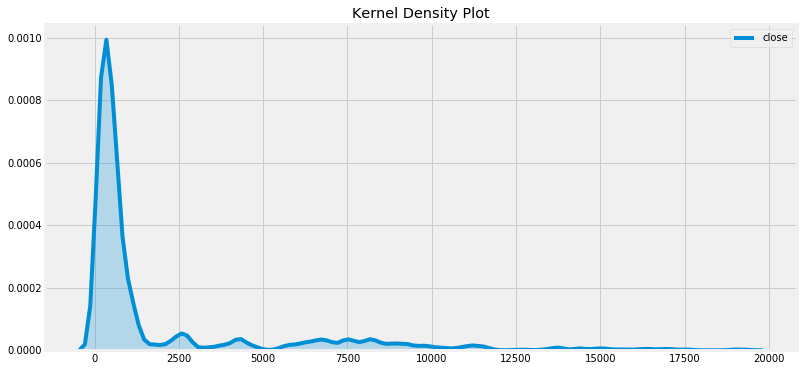

In [9]:
plt.figure(figsize=(12,6))
plt.title("Kernel Density Plot")
sns.kdeplot(data['close'], shade=True)
plt.show()

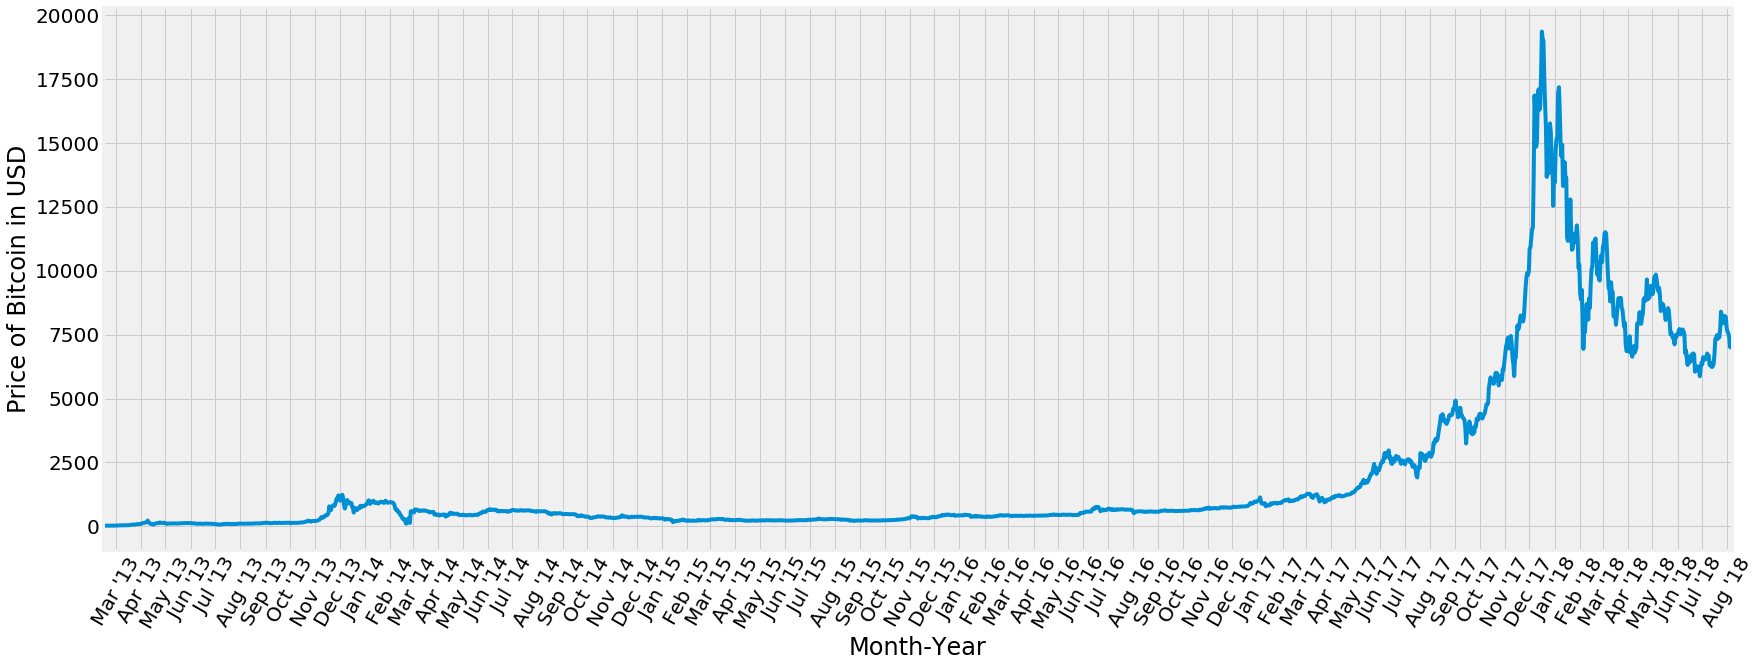

In [10]:
# Plotting the time series :
x_axis = data['time']
y_axis = data['close']
fig, ax = plt.subplots(figsize=(26,10))
plt.xticks(rotation = 60, fontsize=20)
plt.yticks(fontsize = 20)
plt.xlabel("Month-Year", fontsize=24)
plt.ylabel("Price of Bitcoin in USD", fontsize = 24)
plt.xlim((x_axis[0], x_axis[2000]))
ax.plot(x_axis, y_axis)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b '%y"))
plt.show()

We see that the price of bitcoin suddenly rose from august of 2017 and has now become somewhat stable around 7500~8000 USD range in july and august of 2018.

##### Open Price Feature :

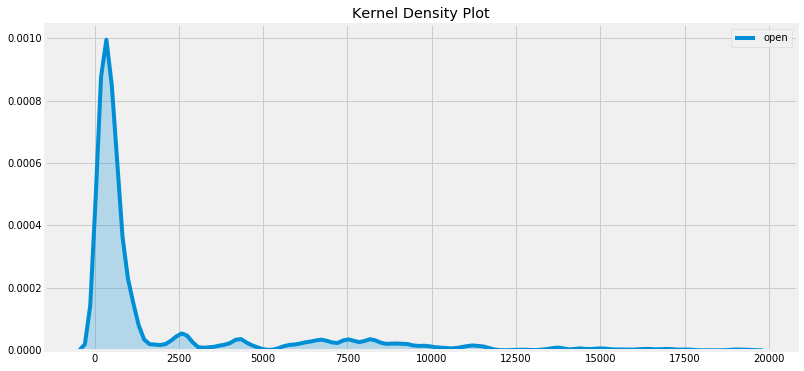

In [11]:
plt.figure(figsize=(12,6))
plt.title("Kernel Density Plot")
sns.kdeplot(data['open'], shade=True)
plt.show()

We see that the open Price feature is strongly corelated with close price feature which makes sense.

##### Highest Price Feature :

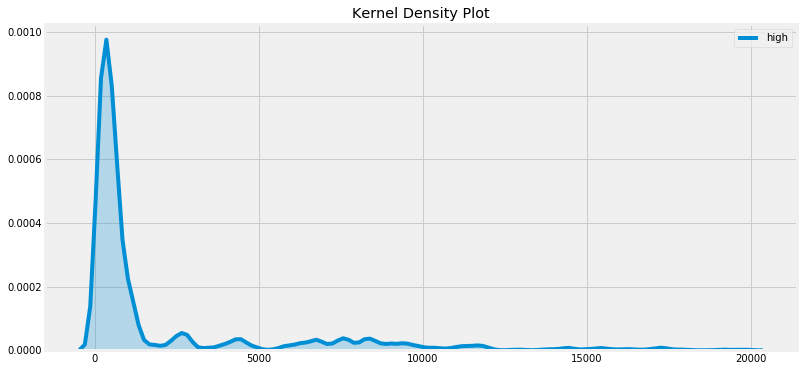

In [12]:
plt.figure(figsize=(12,6))
plt.title("Kernel Density Plot")
sns.kdeplot(data['high'], shade=True)
plt.show()

In [13]:
df = data[['time', 'close']]
df.head()

,time,close
0,2013-02-13 05:30:00,24.20
1,2013-02-14 05:30:00,27.22
2,2013-02-15 05:30:00,27.10
3,2013-02-16 05:30:00,27.22
4,2013-02-17 05:30:00,26.81


In [16]:
df['weekday'] = df['time'].dt.weekday_name
df.head()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,time,close,weekday
0,2013-02-13 05:30:00,24.20,Wednesday
1,2013-02-14 05:30:00,27.22,Thursday
2,2013-02-15 05:30:00,27.10,Friday
3,2013-02-16 05:30:00,27.22,Saturday
4,2013-02-17 05:30:00,26.81,Sunday


In [31]:
df2 = pd.DataFrame(df.groupby(['weekday'])['close'].mean())

##### Week days trend :

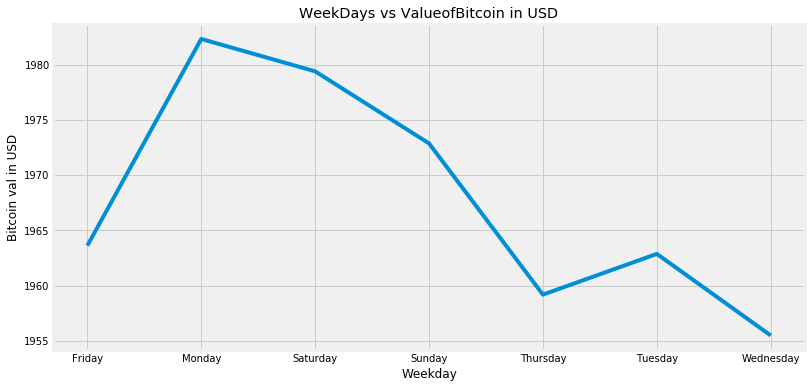

In [34]:
plt.figure(figsize=(12,6))
plt.title("WeekDays vs ValueofBitcoin in USD")
plt.xlabel("Weekday")
plt.ylabel("Bitcoin val in USD")
plt.plot(df2.index, df2.values)
plt.show()

Bitcoin prices are usually highest on monday and lowest on wednesdays but the diference is not much.

In [43]:
month = ["" ,'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df['month'] = df['time'].dt.month
df['month'] = df['month'].apply(lambda x: month[x])
df.head()

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,time,close,weekday,month
0,2013-02-13 05:30:00,24.20,Wednesday,Feb
1,2013-02-14 05:30:00,27.22,Thursday,Feb
2,2013-02-15 05:30:00,27.10,Friday,Feb
3,2013-02-16 05:30:00,27.22,Saturday,Feb
4,2013-02-17 05:30:00,26.81,Sunday,Feb


In [44]:
df2 = pd.DataFrame(df.groupby(['month'])['close'].mean())

##### Monthly Trend :

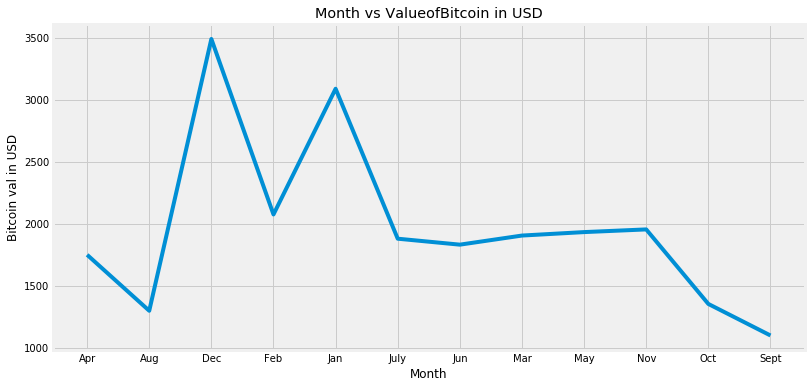

In [46]:
plt.figure(figsize=(12,6))
plt.title("Month vs ValueofBitcoin in USD")
plt.xlabel("Month")
plt.ylabel("Bitcoin val in USD")
plt.plot(df2.index, df2.values)
plt.show()

December and January seem to be the month when the price of Bitcoin is the highest while Sept has lowest exchange rates.

In [49]:
df.index = df['time'].dt.strftime("%Y-%m-%d")
df.head()

,time,close,weekday,month
time,,,,
2013-02-13,2013-02-13 05:30:00,24.20,Wednesday,Feb
2013-02-14,2013-02-14 05:30:00,27.22,Thursday,Feb
2013-02-15,2013-02-15 05:30:00,27.10,Friday,Feb
2013-02-16,2013-02-16 05:30:00,27.22,Saturday,Feb
2013-02-17,2013-02-17 05:30:00,26.81,Sunday,Feb


In [50]:
df = df['close']
df.head()

time
2013-02-13    24.20
2013-02-14    27.22
2013-02-15    27.10
2013-02-16    27.22
2013-02-17    26.81
Name: close, dtype: float64

In [51]:
df = pd.DataFrame(df)

##### Return on Investment :

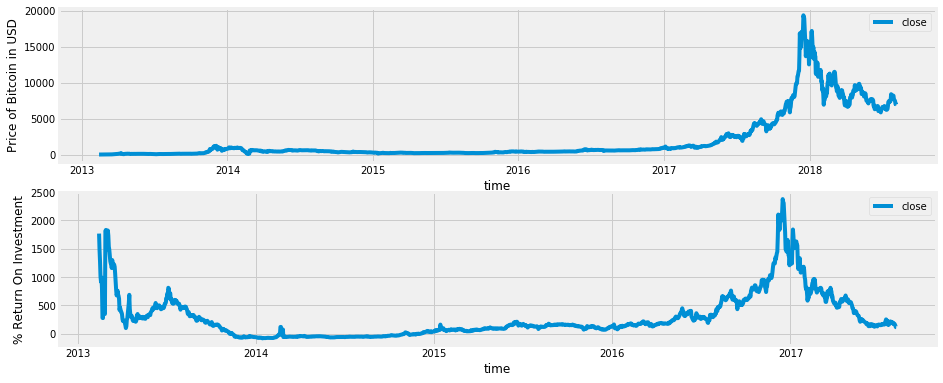

In [61]:
df = df.asfreq('D', method='pad')
ROI = 100 * (df.tshift(-365) / df - 1)
fig, ax = plt.subplots(nrows=2)
df.plot(figsize=(14,6), ax=ax[0])
ROI.plot(figsize=(14,6), ax=ax[1])
ax[0].set_ylabel("Price of Bitcoin in USD")
ax[1].set_ylabel("% Return On Investment")
plt.subplots_adjust(bottom = 0.1)
plt.show()

From above two figures we see that in order to have obtained highest return on investment Bitcoin should have been purchased in 2017